In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
base_dir = "C:/Users/vaibh/Downloads/archive/PetImages"  # Replace with the actual path
# Define paths for the subfolders
dog_dir = os.path.join(base_dir, "Dog")
cat_dir = os.path.join(base_dir, "Cat")

In [3]:
def load_and_flatten_images_and_labels(dog_dir, cat_dir, image_size=(64, 64)):
    images = []
    labels = []
    
    # Load and flatten dog images
    for file_name in os.listdir(dog_dir):
        file_path = os.path.join(dog_dir, file_name)
        try:
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            if img is None:  # Check if the image is valid
                print(f"Skipping file (could not load): {file_path}")
                continue
            img_resized = cv2.resize(img, image_size)  # Resize the image
            img_flattened = img_resized.flatten()  # Flatten the image
            images.append(img_flattened)
            labels.append(1)  # Label for dogs
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    
    # Load and flatten cat images
    for file_name in os.listdir(cat_dir):
        file_path = os.path.join(cat_dir, file_name)
        try:
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            if img is None:  # Check if the image is valid
                print(f"Skipping file (could not load): {file_path}")
                continue
            img_resized = cv2.resize(img, image_size)  # Resize the image
            img_flattened = img_resized.flatten()  # Flatten the image
            images.append(img_flattened)
            labels.append(0)  # Label for cats
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    
    return np.array(images), np.array(labels)

In [4]:
images, labels = load_and_flatten_images_and_labels(dog_dir, cat_dir)

print(f"Total images loaded: {len(images)}")
print(f"Total labels loaded: {len(labels)}")

Skipping file (could not load): C:/Users/vaibh/Downloads/archive/PetImages\Cat\140.jpg
Total images loaded: 1118
Total labels loaded: 1118


In [5]:
images

array([[121, 131, 161, ...,  78,  75,  87],
       [108, 122, 116, ..., 240, 236, 233],
       [114, 100,  95, ...,  92,  90,  94],
       ...,
       [105, 110, 112, ...,  99, 111, 108],
       [  7,   7,   7, ...,  24,  25,  34],
       [164, 163, 162, ..., 157, 121,  23]], dtype=uint8)

In [6]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [7]:
# Convert images (training samples) to float32
train_images = images.astype('float32')

# Convert labels to integers and reshape to (label size, 1)
train_labels = labels.astype('int').reshape(-1, 1)

# Check the shape and type
print("Shape of train_images:", train_images.shape)
print("Type of train_images:", train_images.dtype)

print("Shape of train_labels:", train_labels.shape)
print("Type of train_labels:", train_labels.dtype)

# Example of what train_labels looks like
print("Example of train_labels:", train_labels)  # Prints the first 5 labels

Shape of train_images: (1118, 4096)
Type of train_images: float32
Shape of train_labels: (1118, 1)
Type of train_labels: int32
Example of train_labels: [[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [8]:
test_size = 0.2
train_samples, test_samples, train_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=test_size, random_state=2)

In [9]:
train_samples

array([[  2.,  21.,  67., ...,  78.,  75.,  65.],
       [221., 234., 235., ...,  79.,  58.,  57.],
       [ 71.,  72.,  96., ...,  52.,  48.,  47.],
       ...,
       [224., 225., 225., ..., 226., 230., 235.],
       [129., 146., 135., ..., 133., 136., 116.],
       [ 18.,  22.,  27., ..., 134., 128., 125.]], dtype=float32)

In [10]:
train_labels.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [11]:
start_datetime = datetime.now()

knn = cv2.ml.KNearest_create()
knn.train(train_samples, cv2.ml.ROW_SAMPLE, train_labels)

## get different values of K
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
k_result = []
for k in k_values:
    ret,result,neighbours,dist = knn.findNearest(test_samples,k=k)
    k_result.append(result)
flattened = []
for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)

end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime-start_datetime))

Training Duration: 0:00:00.829742


In [12]:
## create an empty list to save accuracy and the cofusion matrix
accuracy_res = []
con_matrix = []
## we will use a loop because we have multiple value of k
for k_res in k_result:
    label_names = [0, 1]
    cmx = confusion_matrix(test_labels, k_res, labels=label_names)
    con_matrix.append(cmx)
    ## get values for when we predict accurately
    matches = k_res==test_labels
    correct = np.count_nonzero(matches)
    ## calculate accuracy
    accuracy = correct*100.0/result.size
    accuracy_res.append(accuracy)
## stor accuracy for later when we create the graph
res_accuracy = {k_values[i]: accuracy_res[i] for i in range(len(k_values))}
list_res = sorted(res_accuracy.items())

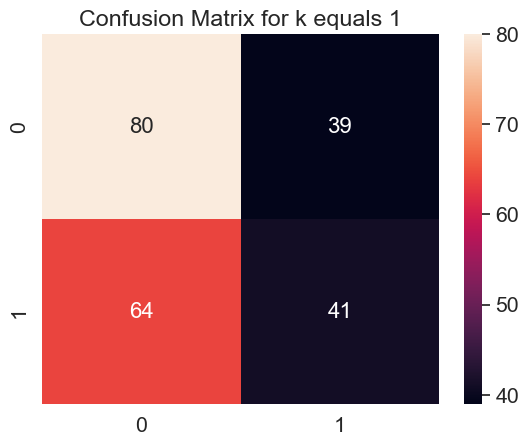

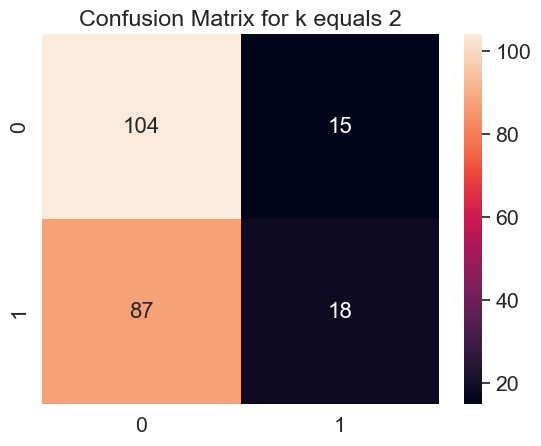

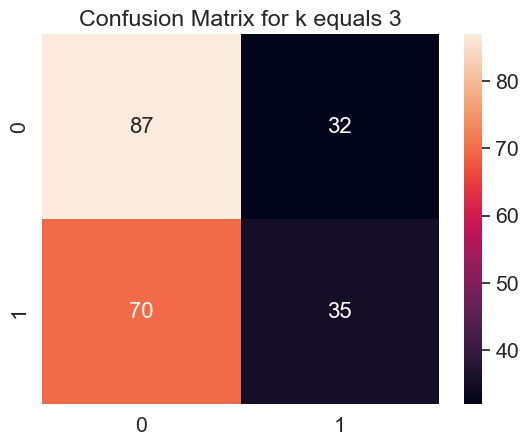

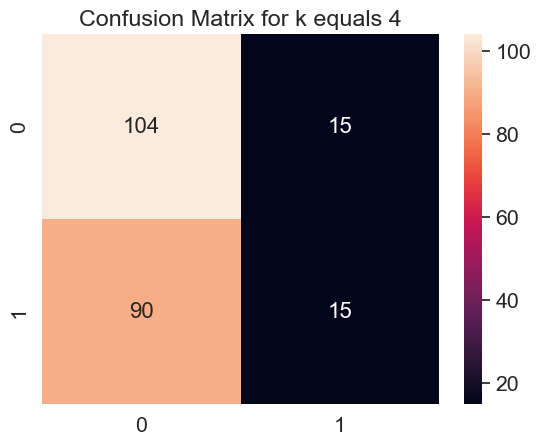

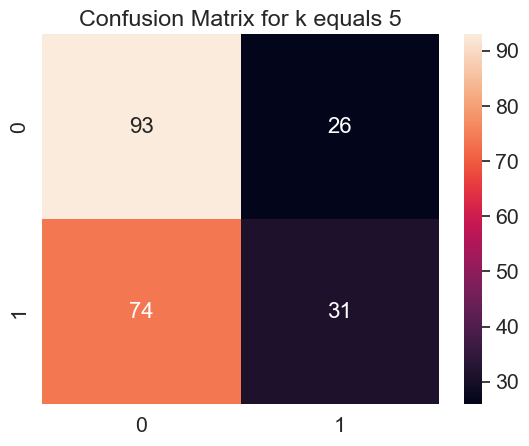

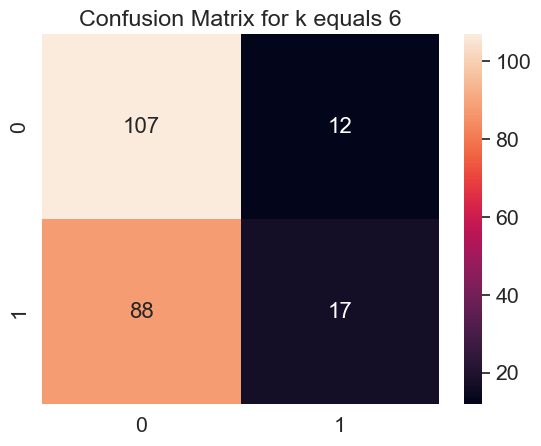

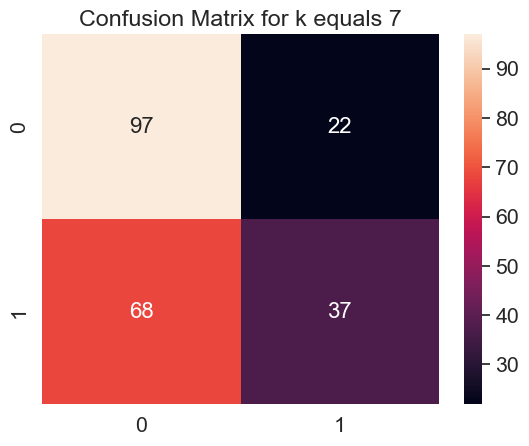

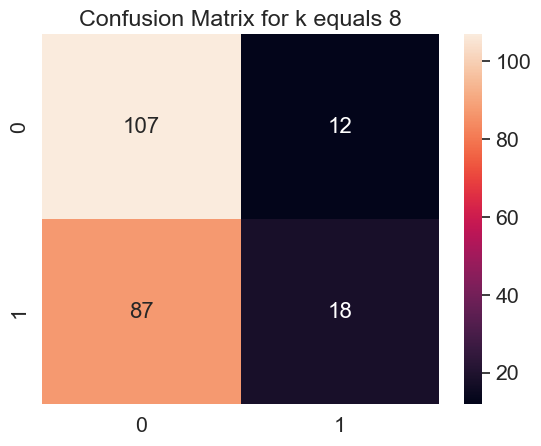

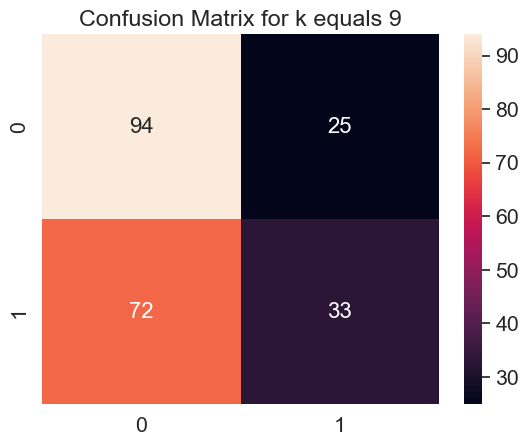

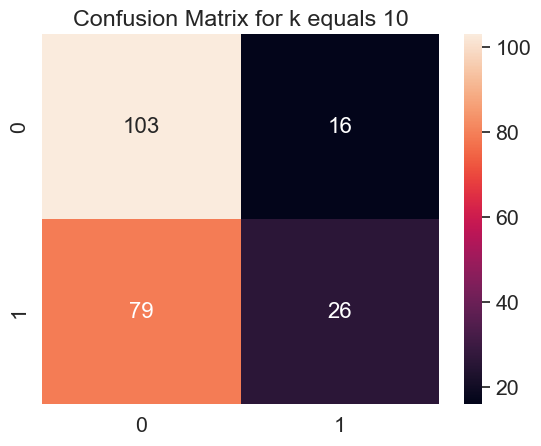

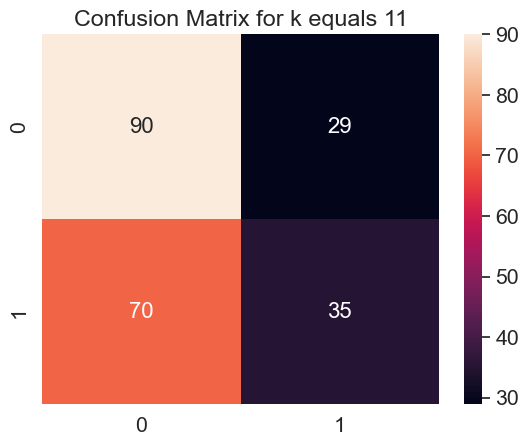

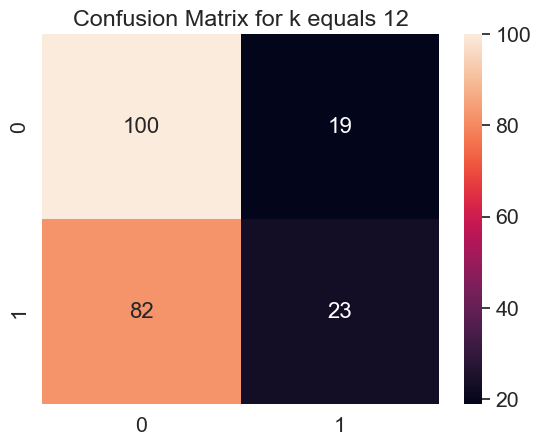

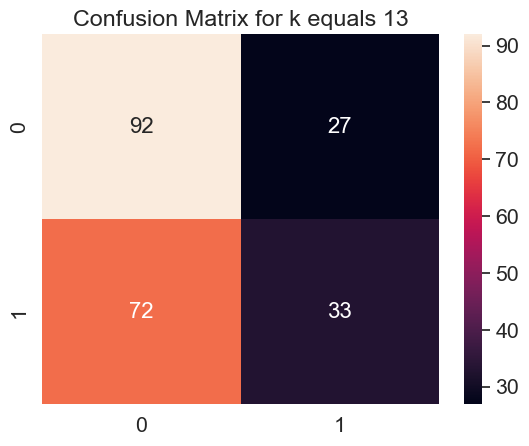

In [13]:
t=0
## for each value of k we will create a confusion matrix
for array in con_matrix:
    df_cm = pd.DataFrame(array)
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt = ".0f") # font size
    t += 1
    title = "Confusion Matrix for k equals " + str(t)
    plt.title(title)
    plt.show()

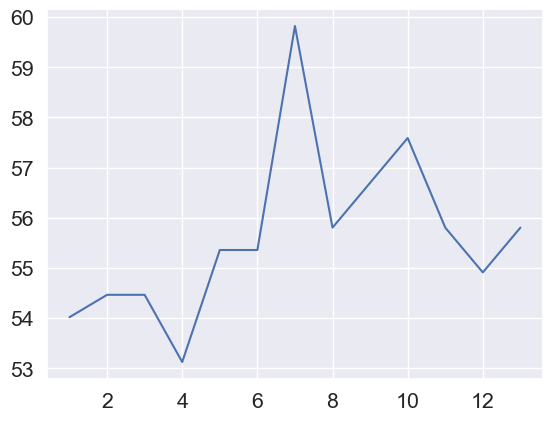

In [14]:
## plot accuracy against 
x, y = zip(*list_res)
plt.plot(x, y)
plt.show()

In [15]:
k_best = max(list_res,key=lambda item:item[1])[0]
k_best

7

In [16]:
knn.save('knn_samples.yml')

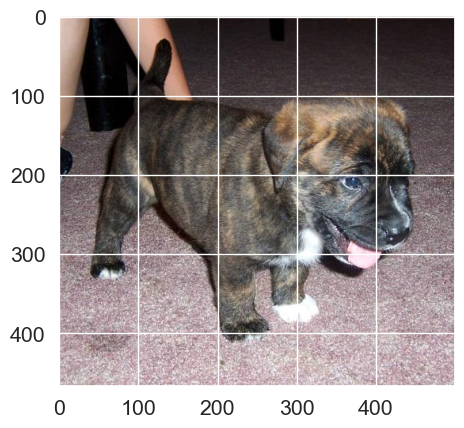

In [17]:
my_image = cv2.imread("C:/Users/vaibh/Downloads/archive/PetImages/Do/1212.jpg")
## let's see what the image looks like
image = cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [18]:
#make images gray
my_image = cv2.cvtColor(my_image,cv2.COLOR_BGR2GRAY)

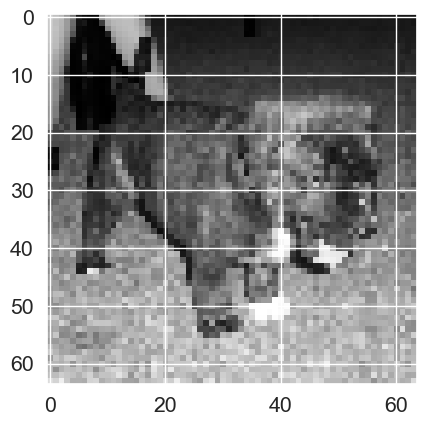

In [19]:
my_image = cv2.resize(my_image, (64, 64))
plt.imshow(my_image, cmap='gray')
plt.show()

In [20]:
pixel_image = my_image.flatten()
pixel_image = np.array([pixel_image]).astype('float32')

In [21]:
ret,result,neighbours,dist = knn.findNearest(pixel_image,k=k_best)
print(neighbours)
# Output the result
predicted_label = int(result[0][0])  # Get the predicted label
label_map = {1: "Dog", 0: "Cat"}  # Define the label mapping
print(f"Predicted label: {predicted_label} ({label_map[predicted_label]})")

[[0. 0. 1. 1. 0. 1. 1.]]
Predicted label: 1 (Dog)


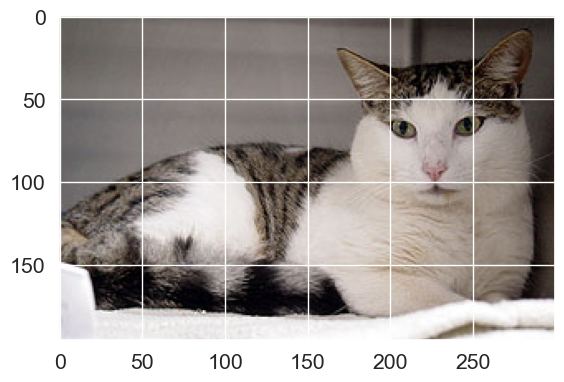

In [25]:
my_image = cv2.imread("C:/Users/vaibh/Downloads/archive/PetImages/Ca/50.jpg")
## let's see what the image looks like
image = cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

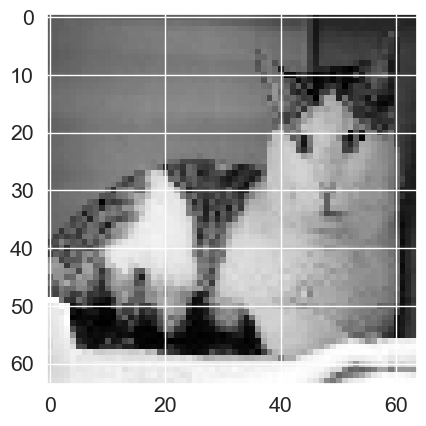

In [26]:
#make images gray
my_image = cv2.cvtColor(my_image,cv2.COLOR_BGR2GRAY)
my_image = cv2.resize(my_image, (64, 64))
plt.imshow(my_image, cmap='gray')
plt.show()
pixel_image = my_image.flatten()
pixel_image = np.array([pixel_image]).astype('float32')

In [27]:
ret,result,neighbours,dist = knn.findNearest(pixel_image,k=k_best)
print(neighbours)
# Output the result
predicted_label = int(result[0][0])  # Get the predicted label
label_map = {1: "Dog", 0: "Cat"}  # Define the label mapping
print(f"Predicted label: {predicted_label} ({label_map[predicted_label]})")

[[0. 0. 0. 1. 0. 1. 0.]]
Predicted label: 0 (Cat)
